# 4.1~ ベースライン

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
%config Completer.use_jedi = False

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import random
np.random.seed(1234)
random.seed(1234)

In [5]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
train_df["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [9]:
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [10]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
# カテゴリ変数確認
categories = all_df.columns[all_df.dtypes == "object"]
categories

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    
    all_df[cat] = all_df[cat].fillna("missing")
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [14]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,2,3,3,0,...,0,3,4,4,0,6,2006,8,4,NaN
2915,2916,160,4,21.0,1894,1,2,3,3,0,...,0,3,4,4,0,4,2006,8,0,NaN
2916,2917,20,3,160.0,20000,1,2,3,3,0,...,0,3,4,4,0,9,2006,8,0,NaN
2917,2918,85,3,62.0,10441,1,2,3,3,0,...,0,3,2,2,700,7,2006,8,4,NaN


In [15]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

In [16]:
import lightgbm as lgb

In [17]:
from sklearn.model_selection import KFold
folds = 3
kf = KFold(n_splits=folds)

In [18]:
lgbm_params = {
    "objective": "regression",
    "random_seed": 1234,
    'early_stopping_round': 20,
#     "max_bin": 331,
#     "num_leaves": 20,
#     "min_data_in_leaf": 57,
#     "verbose": -1,
}

In [19]:
train_X = train_df_le.drop(["Id", "SalePrice"], axis=1)
train_Y = train_df_le["SalePrice"]

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, callbacks=[lgb.log_evaluation(period=10)])
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2963
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 74
[LightGBM] [Info] Start training from score 179726.031860
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.58367e+09
[20]	valid_0's l2: 7.52944e+08
[30]	valid_0's l2: 5.90683e+08
[40]	valid_0's l2: 5.50125e+08
[50]	valid_0's l2: 5.43763e+08
[60]	valid_0's l2: 5.40166e+08
[70]	valid_0's l2: 5.45038e+08
Early stopping, best iteration is:
[55]	valid_0's l2: 5.37132e+08
0.12800381488672496
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[

In [22]:
from statistics import mean

In [23]:
# ベースラインのRMSE
mean(rmses)

0.1352849504777467

In [24]:
actual_pred_df = pd.DataFrame({"actual": train_Y, "pred": oof})

<Axes: >

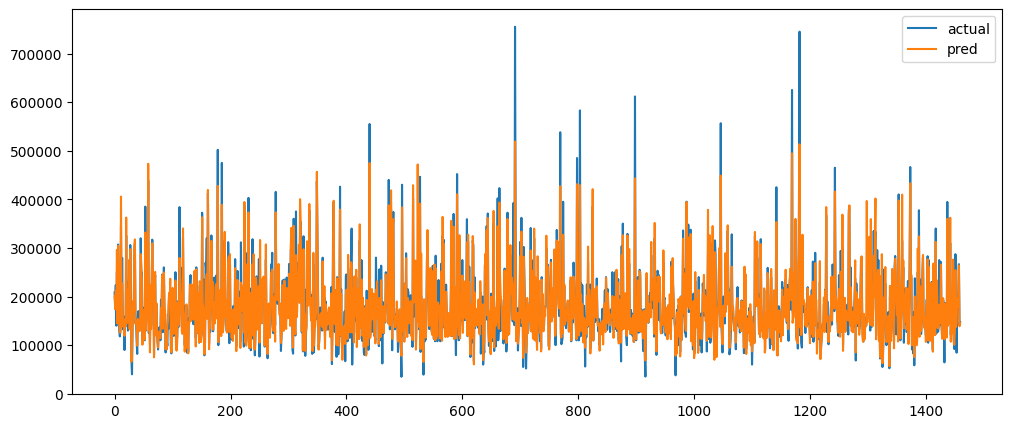

In [25]:
actual_pred_df.plot(figsize=(12, 5))

In [26]:
actual_pred_df.head()

,actual,pred
0,208500.0,200129.223931
1,181500.0,173777.759823
2,223500.0,211386.782962
3,140000.0,182023.095949
4,250000.0,296032.897046


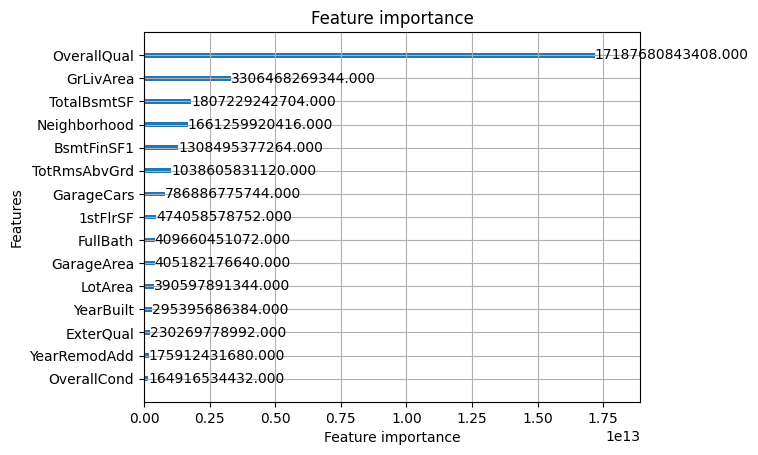

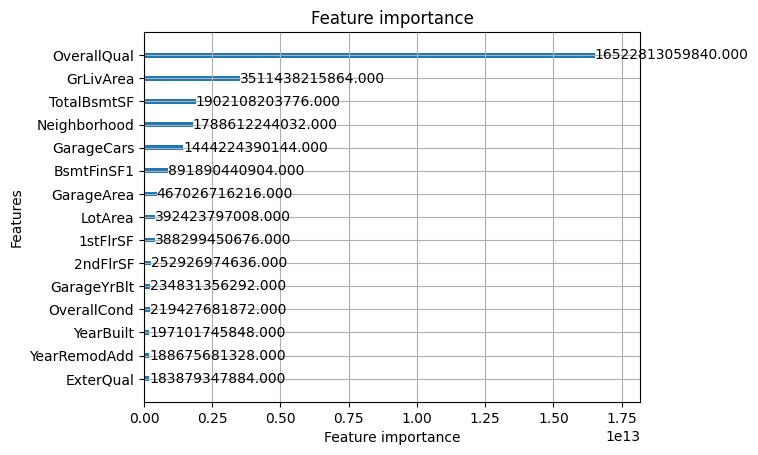

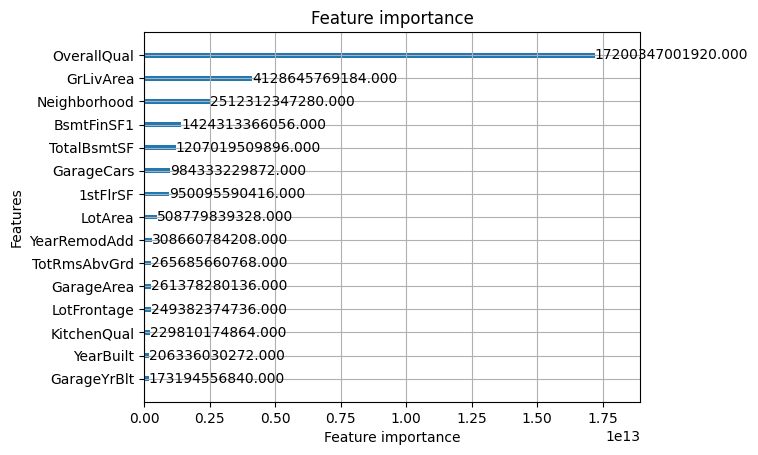

In [27]:
for model in models:
    lgb.plot_importance(model, importance_type="gain", max_num_features=15)

# 4.5 目的変数の前処理: 目的変数の分布確認、対数化

In [28]:
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

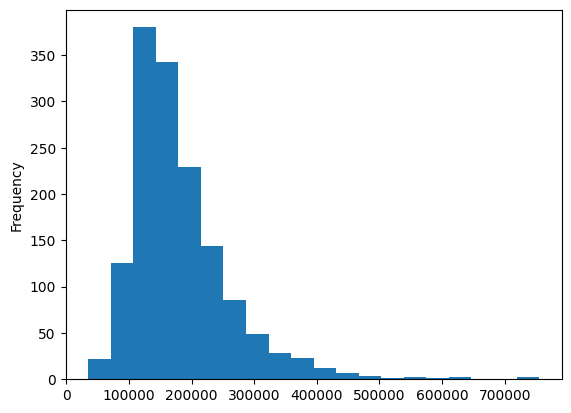

In [29]:
train_df["SalePrice"].plot.hist(bins=20)

In [30]:
# 評価指標が対数を取って計算するため、SalePriceを対数化
np.log(train_df["SalePrice"])

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

<Axes: ylabel='Frequency'>

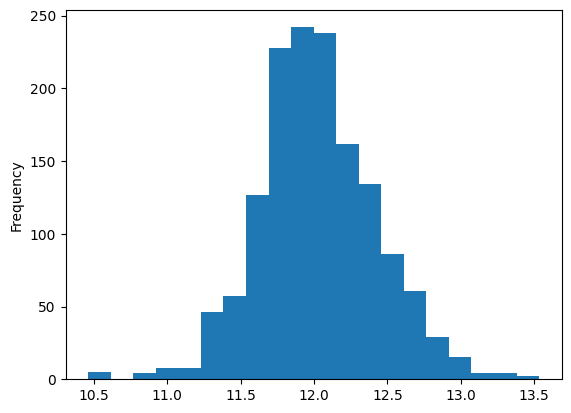

In [31]:
np.log(train_df["SalePrice"]).plot.hist(bins=20)

In [32]:
# 対数化による予測精度向上を確認
train_df_le.loc[:, ["SalePrice_log"]] = np.log(train_df_le["SalePrice"])

In [33]:
train_df_le.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
0,1,60,3,65.0,8450,1,2,3,3,0,...,3,4,4,0,2,2008,8,4,208500.0,12.247694
1,2,20,3,80.0,9600,1,2,3,3,0,...,3,4,4,0,5,2007,8,4,181500.0,12.109011
2,3,60,3,68.0,11250,1,2,0,3,0,...,3,4,4,0,9,2008,8,4,223500.0,12.317167
3,4,70,3,60.0,9550,1,2,0,3,0,...,3,4,4,0,2,2006,8,0,140000.0,11.849398
4,5,60,3,84.0,14260,1,2,0,3,0,...,3,4,4,0,12,2008,8,4,250000.0,12.429216


In [34]:
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [35]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, callbacks=[lgb.log_evaluation(period=10)])
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2963
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 74
[LightGBM] [Info] Start training from score 12.017607
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0436707
[20]	valid_0's l2: 0.0222385
[30]	valid_0's l2: 0.0180434
[40]	valid_0's l2: 0.016907
[50]	valid_0's l2: 0.0165714
[60]	valid_0's l2: 0.0163693
[70]	valid_0's l2: 0.0162283
[80]	valid_0's l2: 0.0161985
[90]	valid_0's l2: 0.0160713
[100]	valid_0's l2: 0.0161346
Did not meet early stopping. Best iteration is:
[90]	valid_0's l2: 0.0160713
0.12677276183461025
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002356 seconds.
You can set `force_row_wise=true` to remove

In [36]:
# 目的変数を対数化したあとのRMSE
mean(rmses)

0.13179298123488878

# 4.6 説明変数の前処理: 欠損値確認 際立って欠損が多いカラムをまとめる

In [37]:
# all_dfを再作成
# カテゴリ変数をオリジナルの値に戻す
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [38]:
# カテゴリ変数確認
categories = all_df.columns[all_df.dtypes == "object"]
categories

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [39]:
all_df.isnull().sum().sort_values(ascending=False).head(50)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrArea         23
MSZoning            4
Functional          2
BsmtFullBath        2
Utilities           2
BsmtHalfBath        2
Electrical          1
TotalBsmtSF         1
BsmtUnfSF           1
KitchenQual         1
BsmtFinSF2          1
BsmtFinSF1          1
SaleType            1
GarageCars          1
Exterior2nd         1
Exterior1st         1
GarageArea          1
YrSold              0
Fireplaces          0
MoSold              0
MiscVal             0
SaleCondition       0
TotRmsAbvGrd        0
PoolArea            0
3SsnPorch           0
ScreenPorch         0
EnclosedPorch       0
OpenPorchS

In [40]:
# PoolQC, MiscFeature, Alley は欠損値が多いので、高級設備の有無という変数にまとめて変換していく
all_df.PoolQC.value_counts()

PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64

In [41]:
HighFacility_col = ["PoolQC", "MiscFeature", "Alley"]
for col in HighFacility_col:
    if all_df[col].dtype == "object" and len(all_df[all_df[col].isnull()]) > 0:        
        all_df.loc[~all_df[col].isnull(), col] = 1
        all_df.loc[all_df[col].isnull(), col] = 0

In [42]:
all_df.PoolQC.value_counts()

PoolQC
0    2909
1      10
Name: count, dtype: int64

In [43]:
all_df["hasHighFacility"] = all_df["PoolQC"] + all_df["MiscFeature"] + all_df["Alley"]

In [44]:
all_df["hasHighFacility"] = all_df["hasHighFacility"].astype(int)

In [45]:
all_df["hasHighFacility"].value_counts()

hasHighFacility
0    2615
1     295
2       9
Name: count, dtype: int64

In [46]:
# 元の変数は削除
all_df = all_df.drop(["PoolQC", "MiscFeature", "Alley"], axis=1)

# 4.7 外れ値を除外

In [47]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [48]:
# 数値データのみを抜き出す
train_df_num = train_df.select_dtypes(include=[np.number])

In [49]:
train_df_num.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [50]:
train_df_num.YearBuilt.value_counts()

YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: count, Length: 112, dtype: int64

In [51]:
# 比例尺度(ratio scale)ではないもの
nonratio_features = ["Id", "MSSubClass", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MoSold", "YrSold"]

In [52]:
num_features = sorted(list(set(train_df_num) - set(nonratio_features)))
num_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [53]:
# 比例尺度の列のみを抜き出す
train_df_num_rs = train_df_num[num_features]

In [54]:
# 3/4分位数が0、つまり全体の75%以上が0となるカラム
for col in num_features:
    if train_df_num_rs.describe()[col]["75%"] == 0:
        # カラム名と0の行数
        print(col, len(train_df_num_rs[train_df_num_rs[col] == 0]))

3SsnPorch 1436
BsmtFinSF2 1293
BsmtHalfBath 1378
EnclosedPorch 1252
LowQualFinSF 1434
MiscVal 1408
PoolArea 1453
ScreenPorch 1344


Porch, Bath, Pool などは、面積等よりも存在するかどうかが重要そう

In [55]:
# 特定の値しか取らないものを確認
for col in num_features:
    if train_df_num_rs[col].nunique() < 15:
        print(col, train_df_num_rs[col].nunique())

BedroomAbvGr 8
BsmtFullBath 4
BsmtHalfBath 3
Fireplaces 4
FullBath 4
GarageCars 5
HalfBath 3
KitchenAbvGr 4
PoolArea 8
TotRmsAbvGrd 12


In [56]:
# カラムごとの外れ値の個数を確認
# 外れ値は「平均から標準偏差3倍の範囲に入ってないもの」
for col in num_features:
    ser = train_df_num_rs[col]
    outlier_df = train_df_num_rs[(ser > ser.mean() + ser.std()*3) | (ser < ser.mean() - ser.std()*3)]
    print(col, len(outlier_df))

1stFlrSF 12
2ndFlrSF 4
3SsnPorch 23
BedroomAbvGr 14
BsmtFinSF1 6
BsmtFinSF2 50
BsmtFullBath 16
BsmtHalfBath 82
BsmtUnfSF 11
EnclosedPorch 51
Fireplaces 5
FullBath 0
GarageArea 7
GarageCars 0
GarageYrBlt 1
GrLivArea 16
HalfBath 12
KitchenAbvGr 68
LotArea 13
LotFrontage 12
LowQualFinSF 20
MasVnrArea 32
MiscVal 8
OpenPorchSF 27
PoolArea 7
SalePrice 22
ScreenPorch 55
TotRmsAbvGrd 12
TotalBsmtSF 10
WoodDeckSF 22


<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

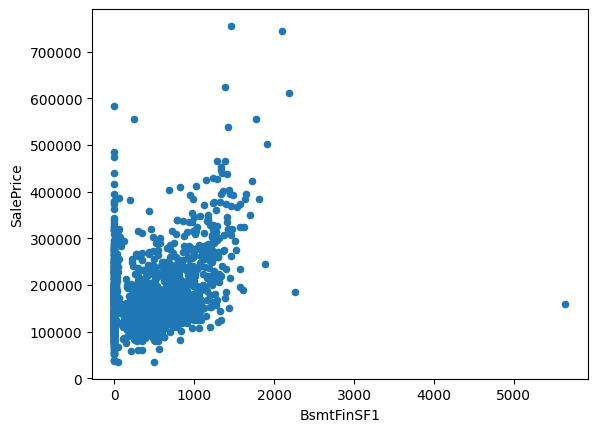

In [57]:
# BsmtFinSF1 について散布図を見る
all_df.plot.scatter(x="BsmtFinSF1", y="SalePrice")

In [58]:
# 右下の外れ値を確認
all_df[all_df["BsmtFinSF1"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

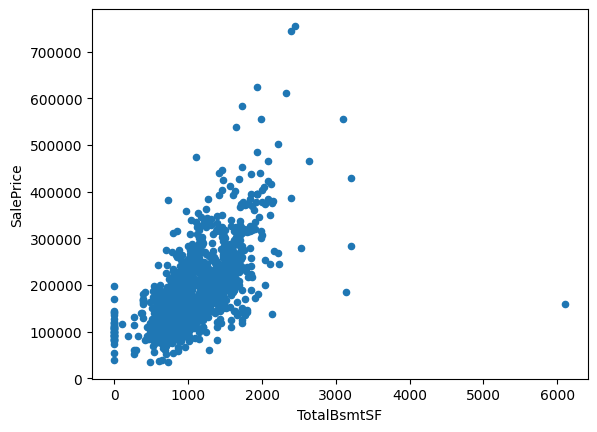

In [59]:
# TotalBsmtSF の散布図
all_df.plot.scatter(x="TotalBsmtSF", y="SalePrice")

In [60]:
# 右下の外れ値を確認
all_df[all_df["TotalBsmtSF"] > 6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

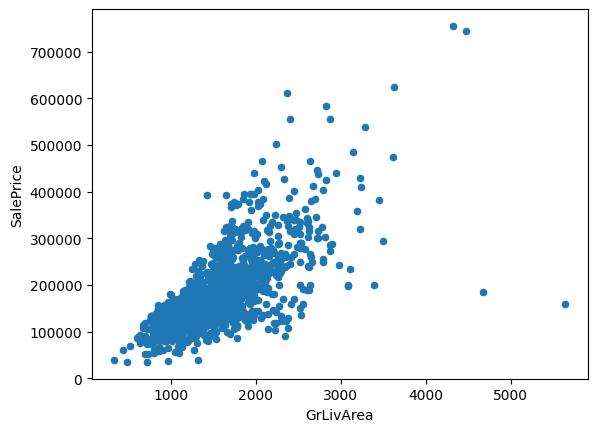

In [61]:
# GrLivArea （地上居住面積）の散布図
all_df.plot.scatter(x="GrLivArea", y="SalePrice")

In [62]:
all_df[all_df["GrLivArea"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

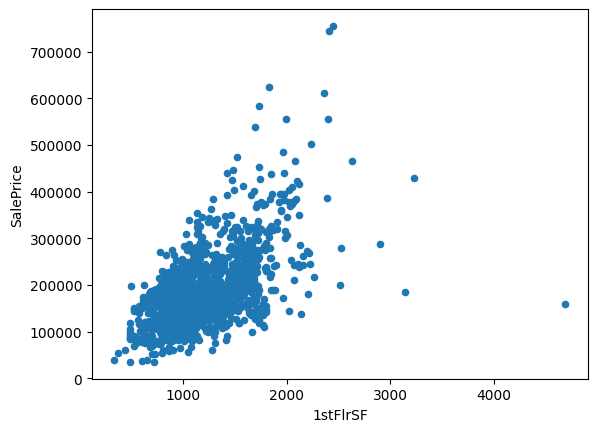

In [63]:
# 1stFlrSF 1階の面積の散布図
all_df.plot.scatter(x="1stFlrSF", y="SalePrice")

In [64]:
all_df[all_df["1stFlrSF"] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


<Axes: xlabel='LotArea', ylabel='SalePrice'>

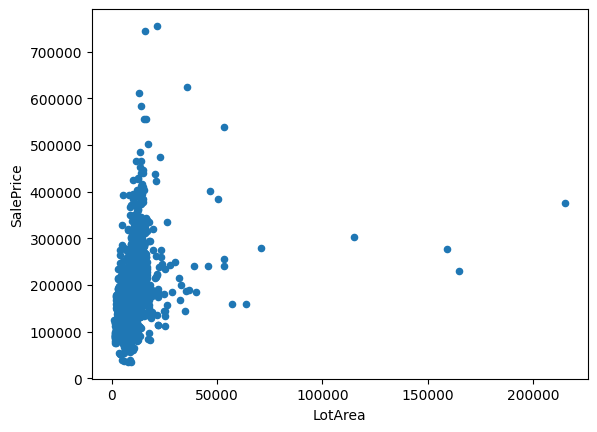

In [65]:
# 敷地面積
all_df.plot.scatter(x="LotArea", y="SalePrice")

In [66]:
# 「外れ値以外 または　テストデータ」を残す（それ以外を除外）
# 上記の散布図を参考に閾値をもうけた
print(len(all_df))

col_threshold = {
    "BsmtFinSF1": 2000,
    "TotalBsmtSF": 3000,
    "GrLivArea": 4500,
    "1stFlrSF": 2500,
    "LotArea": 100000,
}

for col, threshold in col_threshold.items():
    all_df = all_df[(all_df[col] < threshold) | (all_df["SalePrice"].isnull())]
    
print(len(all_df))

2919
2904


## ここまで前処理してきたデータで再度RMSEを計算

In [67]:
# 高級設備としてまとめたカラムをdrop
categories = categories.drop(["PoolQC", "MiscFeature", "Alley"])

In [68]:
categories

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [69]:
# ラベルエンコーディング
for cat in categories:
    le = LabelEncoder()
    print(cat)
    
    all_df[cat] = all_df[cat].fillna("missing")
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")

print(all_df.dtypes)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition
Id                    int64
MSSubClass            int64
MSZoning           category
LotFrontage         float64
LotArea               int64
                     ...   
YrSold                int64
SaleType           category
SaleCondition      category
SalePrice           float64
hasHighFacility       int64
Length: 79, dtype: object


In [70]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le.loc[:, ["SalePrice_log"]] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [71]:
train_Y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice_log, dtype: float64

In [72]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, callbacks=[lgb.log_evaluation(period=10)])
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2948
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 72
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0423077
[20]	valid_0's l2: 0.0217695
[30]	valid_0's l2: 0.017511
[40]	valid_0's l2: 0.0162447
[50]	valid_0's l2: 0.0161528
[60]	valid_0's l2: 0.0160055
[70]	valid_0's l2: 0.0160335
[80]	valid_0's l2: 0.0160276
[90]	valid_0's l2: 0.0160347
[100]	valid_0's l2: 0.0160414
Did not meet early stopping. Best iteration is:
[98]	valid_0's l2: 0.0159996
0.12648953494655646
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002084 seconds.
You can set `force_row_wise=true` to remove

In [73]:
mean(rmses)

0.1295664437889394

# 4.8 説明変数の確認： 特徴量生成

大きく以下のカラムがある

- 時間
- 広さ
- 設備数・許容数
- 品質・分類

以下のような特徴量生成が考えられる

- 建築年から販売年までの経過年数（築何年か）
- 1部屋あたりの広さ

In [74]:
# 時間系のカラムの統計量
all_df[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,2904.000000,2904.000000,2745.000000,2904.000000
mean,1971.234504,1984.217975,1978.061202,2007.792011
std,30.319059,20.907346,25.600996,1.316366
min,1872.000000,1950.000000,1895.000000,2006.000000
25%,1953.000000,1965.000000,1960.000000,2007.000000
50%,1973.000000,1993.000000,1979.000000,2008.000000
75%,2001.000000,2004.000000,2002.000000,2009.000000
max,2010.000000,2010.000000,2207.000000,2010.000000


In [75]:
# 建築年から販売年までの経過年数（築何年か）
all_df["Age"] = all_df["YrSold"] - all_df["YearBuilt"]

In [76]:
# 再度検証を行う
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le.loc[:, ["SalePrice_log"]] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, callbacks=[lgb.log_evaluation(period=10)])
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

mean(rmses)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3045
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 73
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.042401
[20]	valid_0's l2: 0.021746
[30]	valid_0's l2: 0.0174195
[40]	valid_0's l2: 0.0162542
[50]	valid_0's l2: 0.0159732
[60]	valid_0's l2: 0.0158821
[70]	valid_0's l2: 0.0158668
[80]	valid_0's l2: 0.0158347
Early stopping, best iteration is:
[62]	valid_0's l2: 0.0158329
0.12582876406357282
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=t

0.12936893883978604

In [77]:
# 広さに関するカラム
print(all_df.columns)
area_columns = all_df.columns[(all_df.columns.str.contains("Area")) | (all_df.columns.str.contains("SF")) | (all_df.columns.str.contains("Porch")) | (all_df.columns.str.contains("Area")) | (all_df.columns == "LotFrontage")]
all_df[area_columns].describe()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
count,2425.000000,2904.000000,2882.000000,2903.000000,2903.000000,2903.000000,2903.000000,2904.000000,2904.000000,2904.000000,2904.000000,2903.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000
mean,69.071340,9912.604683,101.191187,434.926628,49.016879,559.850499,1043.794006,1152.707300,336.355372,4.718664,1493.781336,471.632794,93.265840,47.226584,22.988636,2.615702,16.086777,1.907025
std,22.662001,5178.128224,177.804595,440.128728,168.444473,438.438879,420.008348,377.291394,427.355787,46.515308,491.149725,214.551791,125.855568,67.195477,64.055325,25.252464,56.245764,33.082892
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7448.250000,0.000000,0.000000,0.000000,220.000000,791.500000,875.750000,0.000000,0.000000,1124.000000,319.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68.000000,9422.000000,0.000000,365.000000,0.000000,467.000000,988.000000,1080.000000,0.000000,0.000000,1441.000000,478.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11503.000000,164.000000,728.500000,0.000000,802.500000,1296.000000,1381.250000,704.000000,0.000000,1739.250000,576.000000,168.000000,69.250000,0.000000,0.000000,0.000000,0.000000
max,313.000000,70761.000000,1600.000000,4010.000000,1526.000000,2336.000000,5095.000000,5095.000000,1872.000000,1064.000000,5095.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000


In [78]:
# トータルの広さ
all_df["TotalSF"] = all_df["TotalBsmtSF"] + all_df["1stFlrSF"] + all_df["2ndFlrSF"]
# お風呂数合計
all_df["Total_Bathrooms"] = all_df["FullBath"] + all_df["HalfBath"] + all_df["BsmtFullBath"] + all_df["BsmtHalfBath"]

In [79]:
# Porchの広さの合計
all_df["Total_PorchSF"] = all_df["WoodDeckSF"] + all_df["OpenPorchSF"] + all_df["EnclosedPorch"] + all_df["3SsnPorch"] + all_df["ScreenPorch"]

In [80]:
# Porchの広さをPorchの有無に変換
all_df["hasPorch"] = all_df["Total_PorchSF"].apply(lambda x: 1 if x > 0 else 0)
all_df = all_df.drop("Total_PorchSF", axis=1)

In [81]:
all_df["hasPorch"].value_counts()

hasPorch
1    2424
0     480
Name: count, dtype: int64

In [82]:
# 再度検証を行う
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le.loc[:, ["SalePrice_log"]] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, callbacks=[lgb.log_evaluation(period=10)])
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

mean(rmses)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3309
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 76
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0383743
[20]	valid_0's l2: 0.0198815
[30]	valid_0's l2: 0.0164664
[40]	valid_0's l2: 0.0156914
[50]	valid_0's l2: 0.0154145
[60]	valid_0's l2: 0.0154487
Early stopping, best iteration is:
[48]	valid_0's l2: 0.0154024
0.12410644096766074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3299
[LightGBM] [Info

0.12715852593003876

# 4.9 ハイパーパラメータを最適化する

以下を最適化する

- num_leaves
- max_bin
  - 一つの分岐に入るデータ数の最大値を指定
- bagging_fraction
  - baggingで選択されるサンプルの割合です。default 1.0で、baggingは無効化されています。また、baggingするには"bagging_freq"も正の値にしなくてはなりません。
- bagging_freq
  - 何回に一回baggingするかです。こちらだけセットしてもやはりbaggingは出来ず、baggingするには"bagging_fraction"が1未満である必要があります。
- feature_fraction
  - 1.0未満の値にすると、特徴量の一部を削減して学習を行う用になります。default 1.0です。
- min_data_in_leaf
- min_sum_hessian_in_leaf

参考:
- https://qiita.com/nabenabe0928/items/6b9772131ba89da00354#max_bin
- https://zenn.dev/mosamosa/articles/07d0076c9292136a3639

これまでより長く細かく学習させるため、以下のように固定

- learning_rate を0.05
- n_estimators を1000

参考: https://knknkn.hatenablog.com/entry/2021/06/29/125226

optunaについて
- https://www.salesanalytics.co.jp/datascience/datascience073/

In [83]:
import optuna

In [84]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2, random_state=1234, shuffle=False, stratify=None)

In [90]:
def objective(trial):
    params = {
        "objective": "regression",
        "random_seed": 1234,
        "early_stopping_round": 20,
        "learning_rate": 0.05,
        "n_estimators": 1000,
        "num_leaves": trial.suggest_int("num_leaves", 4, 64),
        "max_bin": trial.suggest_int("max_bin", 50, 200),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 0.9),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 0.9),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 2, 16),
        "min_sum_hessian_in_leaf": trial.suggest_int("min_sum_hessian_in_leaf", 1, 10),
    }

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, callbacks=[lgb.log_evaluation(period=10)])

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    return score

In [91]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=50)
study.best_params

[I 2024-04-01 08:45:04,549] A new study created in memory with name: no-name-11a0b48d-dede-49ac-973c-493d8d4b1efc
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0659468
[20]	valid_0's l2: 0.0360287
[30]	valid_0's l2: 0.0239196
[40]	valid_0's l2: 0.0183967
[50]	valid_0's l2: 0.0161611
[60]	valid_0's l2: 0.015461
[70]	valid_0's l2: 0.0148438
[80]	valid_0's l2: 0.0145826
[90]	valid_0's l2: 0.0144628
[100]	valid_0's l2: 0.0143176
[110]	valid_0's l2: 0.0142316


[I 2024-04-01 08:45:05,818] Trial 0 finished with value: 0.11921948775949834 and parameters: {'num_leaves': 37, 'max_bin': 157, 'bagging_fraction': 0.7013816880358219, 'bagging_freq': 6, 'feature_fraction': 0.6118273996694523, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 5}. Best is trial 0 with value: 0.11921948775949834.


[120]	valid_0's l2: 0.0142159
[130]	valid_0's l2: 0.0142722
Early stopping, best iteration is:
[119]	valid_0's l2: 0.0142133


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3097
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[I 2024-04-01 08:45:06,880] Trial 1 finished with value: 0.12012901418633552 and parameters: {'num_leaves': 58, 'max_bin': 195, 'bagging_fraction': 0.5917207594128888, 'bagging_freq': 8, 'feature_fraction': 0.6644474598764523, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.11921948775949834.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's l2: 0.0144495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's l2: 0.0145374
[LightGBM] [Warning] No further splits wi

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0723969
[20]	valid_0's l2: 0.0430363
[30]	valid_0's l2: 0.0303053
[40]	valid_0's l2: 0.0239242
[50]	valid_0's l2: 0.0202706
[60]	valid_0's l2: 0.0183297
[70]	valid_0's l2: 0.0171541
[80]	valid_0's l2: 0.0162883
[90]	valid_0's l2: 0.0158127


[I 2024-04-01 08:45:07,204] Trial 2 finished with value: 0.12243462195761393 and parameters: {'num_leaves': 8, 'max_bin': 63, 'bagging_fraction': 0.4101091987201629, 'bagging_freq': 9, 'feature_fraction': 0.7890783754749253, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.11921948775949834.


[100]	valid_0's l2: 0.0154521
[110]	valid_0's l2: 0.0149976
[120]	valid_0's l2: 0.0150278
[130]	valid_0's l2: 0.0150877
Early stopping, best iteration is:
[113]	valid_0's l2: 0.0149902
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2354
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[10]	valid_0's l2: 0.0641327
[20]	valid_0's l2: 0.034555
[30]	valid_0's l2: 0.0232564
[40]	valid_0's l2: 0.0185056
[50]	valid_0's l2: 0.0165158
[60]	valid_0's l2: 0.0155843
[70]	valid_0's l2: 0.0151748
[80]	valid_0's l2: 0.014894
[90]	valid_0's l2: 0.0148207
[100]	valid_0's l2: 0.0146971
[110]	valid_0's l2: 0.0146044
[120]	valid_0's l2: 0.0145469
[130]	valid_0's l2: 0.0144888
[140]	valid_0's l2: 0.0143614
[150]	valid_0's l2: 0.014341
[160]	valid_0's l2: 0.0143097


[I 2024-04-01 08:45:09,180] Trial 3 finished with value: 0.11948763685441077 and parameters: {'num_leaves': 52, 'max_bin': 119, 'bagging_fraction': 0.7902645881432278, 'bagging_freq': 2, 'feature_fraction': 0.7199605106637619, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.11921948775949834.


[170]	valid_0's l2: 0.0143001
Early stopping, best iteration is:
[157]	valid_0's l2: 0.0142773
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2276
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[10]	valid_0's l2: 0.066408
[20]	valid_0's l2: 0.0363539
[30]	valid_0's l2: 0.0242351
[40]	valid_0's l2: 0.0189323
[50]	valid_0's l2: 0.0162179
[60]	valid_0's l2: 0.0147991
[70]	valid_0's l2: 0.0143232
[80]	valid_0's l2: 0.0143152
[90]	valid_0's l2: 0.0142693
[100]	valid_0's l2: 0.0140259
[110]	valid_0's l2: 0.0140546
[120]	valid_0's l2: 0.0138189
[130]	valid_0's l2: 0.0137193
[140]	valid_0's l2: 0.0137243
[150]	valid_0's l2: 0.0135936
[160]	valid_0's l2: 0.0135242


[I 2024-04-01 08:45:10,450] Trial 4 finished with value: 0.11621335807143585 and parameters: {'num_leaves': 35, 'max_bin': 112, 'bagging_fraction': 0.5322778060523135, 'bagging_freq': 8, 'feature_fraction': 0.6280751661082743, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 1}. Best is trial 4 with value: 0.11621335807143585.


[170]	valid_0's l2: 0.0135713
[180]	valid_0's l2: 0.0136351
Early stopping, best iteration is:
[161]	valid_0's l2: 0.0135055
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2626
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[10]	valid_0's l2: 0.0639992
[20]	valid_0's l2: 0.0357102
[30]	valid_0's l2: 0.0236082
[40]	valid_0's l2: 0.0186928
[50]	valid_0's l2: 0.016742
[60]	valid_0's l2: 0.0157799
[70]	valid_0's l2: 0.0155055
[80]	valid_0's l2: 0.0152684
[90]	valid_0's l2: 0.0151588
[100]	valid_0's l2: 0.0151961
[110]	valid_0's l2: 0.0152685
Early stopping, best iteration is:
[94]	valid_0's l2: 0.0151008


[I 2024-04-01 08:45:11,552] Trial 5 finished with value: 0.12288551018586134 and parameters: {'num_leaves': 41, 'max_bin': 142, 'bagging_fraction': 0.7084669984373785, 'bagging_freq': 10, 'feature_fraction': 0.7409101495517417, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 5}. Best is trial 4 with value: 0.11621335807143585.
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1500
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0650692
[20]	valid_0's l2: 0.035213
[30]	valid_0's l2: 0.0235695
[40]	valid_0's l2: 0.0189368
[50]	valid_0's l2: 0.0171787
[60]	valid_0's l2: 0.0162984
[70]	valid_0's l2: 0.0160839
[80]	valid_0's l2: 0.0159674
[90]	valid_0's l2: 0.0157391
[100]	valid_0's l2: 0.0156661
[110]	valid_0's l2: 0.015579
[120]	valid_0's l2: 0.0154832
[130]	valid_0's l2: 0.0153392
[140]	valid_0's l2: 0.0153525
[150]	valid_0's l2: 0.0153259


[I 2024-04-01 08:45:13,553] Trial 6 finished with value: 0.12372288602804948 and parameters: {'num_leaves': 46, 'max_bin': 59, 'bagging_fraction': 0.7333833577228339, 'bagging_freq': 7, 'feature_fraction': 0.5051912805369205, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 4}. Best is trial 4 with value: 0.11621335807143585.


[160]	valid_0's l2: 0.0153393
[170]	valid_0's l2: 0.015381
Early stopping, best iteration is:
[152]	valid_0's l2: 0.0153074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2554
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0685588
[20]	valid_0's l2: 0.0385705
[30]	valid_0's l2: 0.0262354
[40]	valid_0's l2: 0.0206248
[50]	valid_0's l2: 0.017847
[60]	valid_0's l2: 0.0167885
[70]	valid_0's l2: 0.0160365
[80]	valid_0's l2: 0.0157248
[90]	valid_0's l2: 0.0156422
[100]	valid_0's l2: 0.0155114
[110]	valid_0's l2: 0.0154175
[120]	valid_0's l2: 0.015317
[130]	valid_0's l2: 0.0151995
[140]	valid_0's l2: 0.0152626
[150]	valid_0's l2: 0.0152446


[I 2024-04-01 08:45:14,630] Trial 7 finished with value: 0.12325661836479342 and parameters: {'num_leaves': 26, 'max_bin': 136, 'bagging_fraction': 0.6193007567311601, 'bagging_freq': 10, 'feature_fraction': 0.45102240537401406, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 2}. Best is trial 4 with value: 0.11621335807143585.


Early stopping, best iteration is:
[134]	valid_0's l2: 0.0151922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1959
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0653917


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[20]	valid_0's l2: 0.0353138
[30]	valid_0's l2: 0.0236292
[40]	valid_0's l2: 0.0191997
[50]	valid_0's l2: 0.0170269
[60]	valid_0's l2: 0.0159562
[70]	valid_0's l2: 0.015702
[80]	valid_0's l2: 0.0155463
[90]	valid_0's l2: 0.0154414
[100]	valid_0's l2: 0.0153966
[110]	valid_0's l2: 0.0153345
[120]	valid_0's l2: 0.0152618
[130]	valid_0's l2: 0.015293
[140]	valid_0's l2: 0.0152435
[150]	valid_0's l2: 0.0152064
[160]	valid_0's l2: 0.0151995
[170]	valid_0's l2: 0.0152254
Early stopping, best iteration is:
[159]	valid_0's l2: 0.0151783


[I 2024-04-01 08:45:16,634] Trial 8 finished with value: 0.123200368396042 and parameters: {'num_leaves': 43, 'max_bin': 88, 'bagging_fraction': 0.6331553864281532, 'bagging_freq': 3, 'feature_fraction': 0.4794847918227599, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 7}. Best is trial 4 with value: 0.11621335807143585.
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1819
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0720131
[20]	valid_0's l2: 0.0421651
[30]	valid_0's l2: 0.0286681
[40]	valid_0's l2: 0.0219793
[50]	valid_0's l2: 0.0183408
[60]	valid_0's l2: 0.0164611
[70]	valid_0's l2: 0.01556
[80]	valid_0's l2: 0.015073
[90]	valid_0's l2: 0.0147495
[100]	valid_0's l2: 0.0145849
[110]	valid_0's l2: 0.0144036
[120]	valid_0's l2: 0.014341


[I 2024-04-01 08:45:17,313] Trial 9 finished with value: 0.11833589511118965 and parameters: {'num_leaves': 12, 'max_bin': 79, 'bagging_fraction': 0.5843625853304821, 'bagging_freq': 9, 'feature_fraction': 0.44855063789653066, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 1}. Best is trial 4 with value: 0.11621335807143585.


[130]	valid_0's l2: 0.0143924
[140]	valid_0's l2: 0.0141699
[150]	valid_0's l2: 0.014075
[160]	valid_0's l2: 0.0140656
[170]	valid_0's l2: 0.0140668
[180]	valid_0's l2: 0.0140637
Early stopping, best iteration is:
[164]	valid_0's l2: 0.0140034


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2368
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0645947
[20]	valid_0's l2: 0.0349
[30]	valid_0's l2: 0.0239167
[40]	valid_0's l2: 0.019325
[50]	valid_0's l2: 0.017922
[60]	valid_0's l2: 0.017351
[70]	valid_0's l2: 0.0171303
[80]	valid_0's l2: 0.0171538
[90]	valid_0's l2: 0.0170625
[100]	valid_0's l2: 0.0169556
[110]	valid_0's l2: 0.0169456
[120]	valid_0's l2: 0.0168885
[130]	valid_0's l2: 0.0168479
[140]	valid_0's l2: 0.0168025
[150]	valid_0's l2: 0.0167815


[I 2024-04-01 08:45:19,558] Trial 10 finished with value: 0.1295435415929816 and parameters: {'num_leaves': 63, 'max_bin': 120, 'bagging_fraction': 0.8883805440951686, 'bagging_freq': 7, 'feature_fraction': 0.7696317896991509, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 3}. Best is trial 4 with value: 0.11621335807143585.


[160]	valid_0's l2: 0.0168289
[170]	valid_0's l2: 0.0168183
Early stopping, best iteration is:
[150]	valid_0's l2: 0.0167815


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2051
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0723296
[20]	valid_0's l2: 0.0424445
[30]	valid_0's l2: 0.0284022
[40]	valid_0's l2: 0.0222346
[50]	valid_0's l2: 0.0189382
[60]	valid_0's l2: 0.0171733
[70]	valid_0's l2: 0.0163607
[80]	valid_0's l2: 0.0154663
[90]	valid_0's l2: 0.0151567
[100]	valid_0's l2: 0.0149257
[110]	valid_0's l2: 0.0147376
[120]	valid_0's l2: 0.0145206
[130]	valid_0's l2: 0.0145659
[140]	valid_0's l2: 0.0145321


[I 2024-04-01 08:45:20,145] Trial 11 finished with value: 0.11992918918638319 and parameters: {'num_leaves': 11, 'max_bin': 94, 'bagging_fraction': 0.45936385947712205, 'bagging_freq': 4, 'feature_fraction': 0.607131497257335, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 7}. Best is trial 4 with value: 0.11621335807143585.


[150]	valid_0's l2: 0.0144151
[160]	valid_0's l2: 0.014383
[170]	valid_0's l2: 0.0144667
[180]	valid_0's l2: 0.0144939
Early stopping, best iteration is:
[160]	valid_0's l2: 0.014383
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1987
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0652096
[20]	valid_0's l2: 0.0355787
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	valid_0's l2: 0.0236788
[40]	valid_0's l2: 0.0185916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's l2: 0.0165607
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's l2: 0.0154825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's l2: 0.0149025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's l2: 0.0146989
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's l2:

[I 2024-04-01 08:45:21,184] Trial 12 finished with value: 0.12066129587078789 and parameters: {'num_leaves': 38, 'max_bin': 90, 'bagging_fraction': 0.6616240267333499, 'bagging_freq': 1, 'feature_fraction': 0.6879732477780897, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 4}. Best is trial 4 with value: 0.11621335807143585.
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002785 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1665
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0675109
[20]	valid_0's l2: 0.0373061
[30]	valid_0's l2: 0.0244711
[40]	valid_0's l2: 0.0192189
[50]	valid_0's l2: 0.0169365
[60]	valid_0's l2: 0.015945
[70]	valid_0's l2: 0.0153745
[80]	valid_0's l2: 0.0150851
[90]	valid_0's l2: 0.014887
[100]	valid_0's l2: 0.0147742
[110]	valid_0's l2: 0.0146256
[120]	valid_0's l2: 0.0146666
[130]	valid_0's l2: 0.0145984
[140]	valid_0's l2: 0.014508
[150]	valid_0's l2: 0.0144821
[160]	valid_0's l2: 0.0144311
[170]	valid_0's l2: 0.014398
[180]	valid_0's l2: 0.0144176


[I 2024-04-01 08:45:23,202] Trial 13 finished with value: 0.1199504383453797 and parameters: {'num_leaves': 44, 'max_bin': 69, 'bagging_fraction': 0.7581636020592828, 'bagging_freq': 3, 'feature_fraction': 0.49159568100355844, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 1}. Best is trial 4 with value: 0.11621335807143585.


[190]	valid_0's l2: 0.0144799
Early stopping, best iteration is:
[171]	valid_0's l2: 0.0143881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1344
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's l2: 0.0357635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2024-04-01 08:45:24,285] Trial 14 finished with value: 0.1183866598579404 and parameters: {'num_leaves': 54, 'max_bin': 50, 'bagging_fraction': 0.7389082683981151, 'bagging_freq': 3, 'feature_fraction': 0.7675970110612975, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 3}. Best is trial 4 with value: 0.11621335807143585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[140]	valid_0's l2: 0.0141645
Early stopping, best iteration is:
[120]	valid_0's l2: 0.0140154
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2590
[LightGBM] [Info] Number of data points in th

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[10]	valid_0's l2: 0.0652192
[20]	valid_0's l2: 0.0356203
[30]	valid_0's l2: 0.023876
[40]	valid_0's l2: 0.0188538
[50]	valid_0's l2: 0.0170089
[60]	valid_0's l2: 0.0161279
[70]	valid_0's l2: 0.0157713
[80]	valid_0's l2: 0.0154205
[90]	valid_0's l2: 0.0153315
[100]	valid_0's l2: 0.0151689
[110]	valid_0's l2: 0.0150059
[120]	valid_0's l2: 0.0150484


[I 2024-04-01 08:45:25,388] Trial 15 finished with value: 0.12249843914982214 and parameters: {'num_leaves': 39, 'max_bin': 139, 'bagging_fraction': 0.6861259528954367, 'bagging_freq': 3, 'feature_fraction': 0.8763745057584925, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 9}. Best is trial 4 with value: 0.11621335807143585.


[130]	valid_0's l2: 0.0150938
Early stopping, best iteration is:
[110]	valid_0's l2: 0.0150059
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0654476


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[20]	valid_0's l2: 0.0348945
[30]	valid_0's l2: 0.0232133
[40]	valid_0's l2: 0.0186158
[50]	valid_0's l2: 0.0167928
[60]	valid_0's l2: 0.0158671
[70]	valid_0's l2: 0.0151884
[80]	valid_0's l2: 0.014973
[90]	valid_0's l2: 0.0148574
[100]	valid_0's l2: 0.0147908
[110]	valid_0's l2: 0.0147467
[120]	valid_0's l2: 0.0147442
[130]	valid_0's l2: 0.0147911
[140]	valid_0's l2: 0.0146097
[150]	valid_0's l2: 0.0146298
[160]	valid_0's l2: 0.0146584
Early stopping, best iteration is:
[141]	valid_0's l2: 0.0145922


[I 2024-04-01 08:45:26,866] Trial 16 finished with value: 0.12079833209560319 and parameters: {'num_leaves': 46, 'max_bin': 94, 'bagging_fraction': 0.8068989098512387, 'bagging_freq': 4, 'feature_fraction': 0.8405515985555808, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 4 with value: 0.11621335807143585.
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2827
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0635115
[20]	valid_0's l2: 0.0356727
[30]	valid_0's l2: 0.0241828
[40]	valid_0's l2: 0.0197761
[50]	valid_0's l2: 0.017458
[60]	valid_0's l2: 0.0164014
[70]	valid_0's l2: 0.0161523
[80]	valid_0's l2: 0.015674
[90]	valid_0's l2: 0.0155865


[I 2024-04-01 08:45:28,018] Trial 17 finished with value: 0.12465732708852482 and parameters: {'num_leaves': 46, 'max_bin': 159, 'bagging_fraction': 0.6506621909633512, 'bagging_freq': 10, 'feature_fraction': 0.7219950996148188, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 7}. Best is trial 4 with value: 0.11621335807143585.


[100]	valid_0's l2: 0.0156389
Early stopping, best iteration is:
[85]	valid_0's l2: 0.0155394
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2060
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0772015
[20]	valid_0's l2: 0.0488641
[30]	valid_0's l2: 0.034581
[40]	valid_0's l2: 0.0270809


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[50]	valid_0's l2: 0.0230393
[60]	valid_0's l2: 0.020913
[70]	valid_0's l2: 0.0198276
[80]	valid_0's l2: 0.018913
[90]	valid_0's l2: 0.0180636
[100]	valid_0's l2: 0.0173222
[110]	valid_0's l2: 0.0167365
[120]	valid_0's l2: 0.0162763
[130]	valid_0's l2: 0.016011
[140]	valid_0's l2: 0.0157394
[150]	valid_0's l2: 0.0154868
[160]	valid_0's l2: 0.0154228
[170]	valid_0's l2: 0.0153516
[180]	valid_0's l2: 0.0152941


[I 2024-04-01 08:45:28,532] Trial 18 finished with value: 0.11966528057480719 and parameters: {'num_leaves': 5, 'max_bin': 95, 'bagging_fraction': 0.7300867687463426, 'bagging_freq': 3, 'feature_fraction': 0.7090077144994208, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 2}. Best is trial 4 with value: 0.11621335807143585.


[190]	valid_0's l2: 0.0150688
[200]	valid_0's l2: 0.0149567
[210]	valid_0's l2: 0.0148402
[220]	valid_0's l2: 0.0148004
[230]	valid_0's l2: 0.0146198
[240]	valid_0's l2: 0.0145606
[250]	valid_0's l2: 0.0145366
[260]	valid_0's l2: 0.0144597
[270]	valid_0's l2: 0.0144057
[280]	valid_0's l2: 0.014351
[290]	valid_0's l2: 0.0143398
[300]	valid_0's l2: 0.0143803
Early stopping, best iteration is:
[282]	valid_0's l2: 0.0143198


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2554
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0666045
[20]	valid_0's l2: 0.037398
[30]	valid_0's l2: 0.0252309
[40]	valid_0's l2: 0.0194101
[50]	valid_0's l2: 0.016904
[60]	valid_0's l2: 0.0160305
[70]	valid_0's l2: 0.0153439
[80]	valid_0's l2: 0.0148304
[90]	valid_0's l2: 0.0147109
[100]	valid_0's l2: 0.0145076
[110]	valid_0's l2: 0.0145036
[120]	valid_0's l2: 0.0144584
[130]	valid_0's l2: 0.0144166


[I 2024-04-01 08:45:30,408] Trial 19 finished with value: 0.12002938223871082 and parameters: {'num_leaves': 22, 'max_bin': 136, 'bagging_fraction': 0.6954363806240866, 'bagging_freq': 6, 'feature_fraction': 0.7266004099285668, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 5}. Best is trial 4 with value: 0.11621335807143585.


[140]	valid_0's l2: 0.0145413
[150]	valid_0's l2: 0.0145218
Early stopping, best iteration is:
[131]	valid_0's l2: 0.014407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2182
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.06419
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2024-04-01 08:45:31,626] Trial 20 finished with value: 0.12442620993318665 and parameters: {'num_leaves': 58, 'max_bin': 105, 'bagging_fraction': 0.6179324626328134, 'bagging_freq': 9, 'feature_fraction': 0.8030969945230428, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 2}. Best is trial 4 with value: 0.11621335807143585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's l2: 0.0154998
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[92]	valid_0's l2: 0.0154819
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2807
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[10]	valid_0's l2: 0.0646566
[20]	valid_0's l2: 0.0348004
[30]	valid_0's l2: 0.023748
[40]	valid_0's l2: 0.0194866
[50]	valid_0's l2: 0.0176701
[60]	valid_0's l2: 0.0170057
[70]	valid_0's l2: 0.0167843
[80]	valid_0's l2: 0.016537
[90]	valid_0's l2: 0.0164991
[100]	valid_0's l2: 0.0163692
[110]	valid_0's l2: 0.0162118
[120]	valid_0's l2: 0.0162129


[I 2024-04-01 08:45:33,437] Trial 21 finished with value: 0.12718774119423695 and parameters: {'num_leaves': 60, 'max_bin': 157, 'bagging_fraction': 0.8994235032839333, 'bagging_freq': 2, 'feature_fraction': 0.8340630286841071, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 7}. Best is trial 4 with value: 0.11621335807143585.


[130]	valid_0's l2: 0.0162495
Early stopping, best iteration is:
[117]	valid_0's l2: 0.0161767
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3017
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[10]	valid_0's l2: 0.0717053
[20]	valid_0's l2: 0.0413166
[30]	valid_0's l2: 0.0279717
[40]	valid_0's l2: 0.0219095
[50]	valid_0's l2: 0.0189611
[60]	valid_0's l2: 0.0172604
[70]	valid_0's l2: 0.0164715
[80]	valid_0's l2: 0.0160482
[90]	valid_0's l2: 0.0157468
[100]	valid_0's l2: 0.0153786
[110]	valid_0's l2: 0.0151728
[120]	valid_0's l2: 0.0149921
[130]	valid_0's l2: 0.0149268
[140]	valid_0's l2: 0.0148403


[I 2024-04-01 08:45:33,989] Trial 22 finished with value: 0.12151261222488925 and parameters: {'num_leaves': 11, 'max_bin': 178, 'bagging_fraction': 0.8036594793625054, 'bagging_freq': 6, 'feature_fraction': 0.6035916486129999, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 7}. Best is trial 4 with value: 0.11621335807143585.


[150]	valid_0's l2: 0.0148404
Early stopping, best iteration is:
[137]	valid_0's l2: 0.0147653
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2831
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0656779


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[20]	valid_0's l2: 0.0362675
[30]	valid_0's l2: 0.0243702
[40]	valid_0's l2: 0.019556
[50]	valid_0's l2: 0.0175464
[60]	valid_0's l2: 0.0166221
[70]	valid_0's l2: 0.016172
[80]	valid_0's l2: 0.0160095
[90]	valid_0's l2: 0.015721
[100]	valid_0's l2: 0.0155644
[110]	valid_0's l2: 0.0154965
[120]	valid_0's l2: 0.0154206
[130]	valid_0's l2: 0.0153846
[140]	valid_0's l2: 0.0154011
[150]	valid_0's l2: 0.0152218
[160]	valid_0's l2: 0.0151882
[170]	valid_0's l2: 0.0151679
[180]	valid_0's l2: 0.0151587
[190]	valid_0's l2: 0.0151501
[200]	valid_0's l2: 0.0151077
[210]	valid_0's l2: 0.0151401


[I 2024-04-01 08:45:35,610] Trial 23 finished with value: 0.12286137283920079 and parameters: {'num_leaves': 31, 'max_bin': 159, 'bagging_fraction': 0.8331911629643146, 'bagging_freq': 10, 'feature_fraction': 0.8279016711963055, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 4}. Best is trial 4 with value: 0.11621335807143585.


[220]	valid_0's l2: 0.0151285
[230]	valid_0's l2: 0.015138
Early stopping, best iteration is:
[214]	valid_0's l2: 0.0150949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1761
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[10]	valid_0's l2: 0.0666495
[20]	valid_0's l2: 0.0366255
[30]	valid_0's l2: 0.0251371
[40]	valid_0's l2: 0.0201572
[50]	valid_0's l2: 0.0179482
[60]	valid_0's l2: 0.0167342
[70]	valid_0's l2: 0.0163499
[80]	valid_0's l2: 0.0159761
[90]	valid_0's l2: 0.0157986
[100]	valid_0's l2: 0.0158269


[I 2024-04-01 08:45:36,943] Trial 24 finished with value: 0.12562753706931873 and parameters: {'num_leaves': 48, 'max_bin': 75, 'bagging_fraction': 0.6605183031020647, 'bagging_freq': 1, 'feature_fraction': 0.49999826244820006, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 8}. Best is trial 4 with value: 0.11621335807143585.


[110]	valid_0's l2: 0.015862
Early stopping, best iteration is:
[91]	valid_0's l2: 0.0157823
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2158
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0688781
[20]	valid_0's l2: 0.0382244


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[30]	valid_0's l2: 0.0256253
[40]	valid_0's l2: 0.0200546
[50]	valid_0's l2: 0.0173239
[60]	valid_0's l2: 0.0160902
[70]	valid_0's l2: 0.0154621
[80]	valid_0's l2: 0.0150493
[90]	valid_0's l2: 0.0148306
[100]	valid_0's l2: 0.0145364
[110]	valid_0's l2: 0.0144797
[120]	valid_0's l2: 0.0143889
[130]	valid_0's l2: 0.0142687
[140]	valid_0's l2: 0.0141614
[150]	valid_0's l2: 0.0140351
[160]	valid_0's l2: 0.0139486
[170]	valid_0's l2: 0.0139869


[I 2024-04-01 08:45:37,929] Trial 25 finished with value: 0.11805245762386342 and parameters: {'num_leaves': 17, 'max_bin': 102, 'bagging_fraction': 0.8640406467327955, 'bagging_freq': 8, 'feature_fraction': 0.41591946476565395, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 7}. Best is trial 4 with value: 0.11621335807143585.


[180]	valid_0's l2: 0.0139826
[190]	valid_0's l2: 0.014061
Early stopping, best iteration is:
[177]	valid_0's l2: 0.0139364
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1911
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[10]	valid_0's l2: 0.0648772
[20]	valid_0's l2: 0.0348522
[30]	valid_0's l2: 0.0229095
[40]	valid_0's l2: 0.0183481
[50]	valid_0's l2: 0.0164278
[60]	valid_0's l2: 0.0157691
[70]	valid_0's l2: 0.0153027
[80]	valid_0's l2: 0.0150543
[90]	valid_0's l2: 0.0150916


[I 2024-04-01 08:45:38,787] Trial 26 finished with value: 0.1225406887451526 and parameters: {'num_leaves': 39, 'max_bin': 85, 'bagging_fraction': 0.867106998962397, 'bagging_freq': 7, 'feature_fraction': 0.6678164015124792, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 8}. Best is trial 4 with value: 0.11621335807143585.


[100]	valid_0's l2: 0.0152523
Early stopping, best iteration is:
[85]	valid_0's l2: 0.0150162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2251
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.066821


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[20]	valid_0's l2: 0.0369266
[30]	valid_0's l2: 0.024767
[40]	valid_0's l2: 0.0192622
[50]	valid_0's l2: 0.0169376
[60]	valid_0's l2: 0.0157414
[70]	valid_0's l2: 0.0150072
[80]	valid_0's l2: 0.0146723
[90]	valid_0's l2: 0.0143443
[100]	valid_0's l2: 0.0143655
[110]	valid_0's l2: 0.0142893


[I 2024-04-01 08:45:39,397] Trial 27 finished with value: 0.11930966687202046 and parameters: {'num_leaves': 23, 'max_bin': 110, 'bagging_fraction': 0.5049218744875611, 'bagging_freq': 2, 'feature_fraction': 0.8721861949919668, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 5}. Best is trial 4 with value: 0.11621335807143585.


Early stopping, best iteration is:
[95]	valid_0's l2: 0.0142348
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1957
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0689996
[20]	valid_0's l2: 0.0393946


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[30]	valid_0's l2: 0.026756
[40]	valid_0's l2: 0.0207262
[50]	valid_0's l2: 0.0181382
[60]	valid_0's l2: 0.0163805
[70]	valid_0's l2: 0.0155477
[80]	valid_0's l2: 0.0151918
[90]	valid_0's l2: 0.0149329
[100]	valid_0's l2: 0.0144812
[110]	valid_0's l2: 0.0143082
[120]	valid_0's l2: 0.0142451
[130]	valid_0's l2: 0.0142627


[I 2024-04-01 08:45:40,024] Trial 28 finished with value: 0.119057350011904 and parameters: {'num_leaves': 17, 'max_bin': 88, 'bagging_fraction': 0.42901458016193783, 'bagging_freq': 5, 'feature_fraction': 0.5558979409970513, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 4}. Best is trial 4 with value: 0.11621335807143585.


Early stopping, best iteration is:
[114]	valid_0's l2: 0.0141747
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1396
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0686203
[20]	valid_0's l2: 0.0388643
[30]	valid_0's l2: 0.0264241
[40]	valid_0's l2: 0.0202205


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[50]	valid_0's l2: 0.0174781
[60]	valid_0's l2: 0.015947
[70]	valid_0's l2: 0.0152872
[80]	valid_0's l2: 0.0148317
[90]	valid_0's l2: 0.0145008
[100]	valid_0's l2: 0.01441
[110]	valid_0's l2: 0.014141


[I 2024-04-01 08:45:40,581] Trial 29 finished with value: 0.1168966718905799 and parameters: {'num_leaves': 14, 'max_bin': 53, 'bagging_fraction': 0.4336248157316243, 'bagging_freq': 7, 'feature_fraction': 0.6268484222780226, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 4 with value: 0.11621335807143585.


[120]	valid_0's l2: 0.0140428
[130]	valid_0's l2: 0.0139158
[140]	valid_0's l2: 0.0137136
[150]	valid_0's l2: 0.0137808
[160]	valid_0's l2: 0.0138247
Early stopping, best iteration is:
[141]	valid_0's l2: 0.0136648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1863
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0683398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-04-01 08:45:42,779] Trial 30 finished with value: 0.11621005960781597 and parameters: {'num_leaves': 64, 'max_bin': 82, 'bagging_fraction': 0.7315391015500504, 'bagging_freq': 3, 'feature_fraction': 0.41032549973286436, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 4}. Best is trial 30 with value: 0.11621005960781597.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[181]	valid_0's l2: 0.0135048
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2578
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0662191


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[20]	valid_0's l2: 0.0375317
[30]	valid_0's l2: 0.0249813
[40]	valid_0's l2: 0.0196436
[50]	valid_0's l2: 0.0175243
[60]	valid_0's l2: 0.016674
[70]	valid_0's l2: 0.0161567
[80]	valid_0's l2: 0.0160406
[90]	valid_0's l2: 0.0159134
[100]	valid_0's l2: 0.0157352
[110]	valid_0's l2: 0.0156062
[120]	valid_0's l2: 0.0154926
[130]	valid_0's l2: 0.0153928
[140]	valid_0's l2: 0.015358
[150]	valid_0's l2: 0.0152489
[160]	valid_0's l2: 0.0153489
[170]	valid_0's l2: 0.0153372
Early stopping, best iteration is:
[154]	valid_0's l2: 0.0152423


[I 2024-04-01 08:45:43,887] Trial 31 finished with value: 0.12345973724558293 and parameters: {'num_leaves': 27, 'max_bin': 138, 'bagging_fraction': 0.8155242276180952, 'bagging_freq': 7, 'feature_fraction': 0.8363253277236977, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 8}. Best is trial 30 with value: 0.11621005960781597.
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3081
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0687108
[20]	valid_0's l2: 0.039362
[30]	valid_0's l2: 0.0268704
[40]	valid_0's l2: 0.0213277
[50]	valid_0's l2: 0.0185501
[60]	valid_0's l2: 0.0172349
[70]	valid_0's l2: 0.0165869
[80]	valid_0's l2: 0.0160938
[90]	valid_0's l2: 0.016112
[100]	valid_0's l2: 0.0158469
[110]	valid_0's l2: 0.0156173
[120]	valid_0's l2: 0.0155477
[130]	valid_0's l2: 0.01557
[140]	valid_0's l2: 0.0155486
[150]	valid_0's l2: 0.0155581
[160]	valid_0's l2: 0.0155437
Early stopping, best iteration is:
[144]	valid_0's l2: 0.0155004


[I 2024-04-01 08:45:44,552] Trial 32 finished with value: 0.12450060870067971 and parameters: {'num_leaves': 15, 'max_bin': 193, 'bagging_fraction': 0.7437441381939076, 'bagging_freq': 3, 'feature_fraction': 0.8736852952444621, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 3}. Best is trial 30 with value: 0.11621005960781597.
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2459
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0682726
[20]	valid_0's l2: 0.0384307
[30]	valid_0's l2: 0.0260289
[40]	valid_0's l2: 0.0204018
[50]	valid_0's l2: 0.0177781
[60]	valid_0's l2: 0.0165407
[70]	valid_0's l2: 0.0158151
[80]	valid_0's l2: 0.0154962
[90]	valid_0's l2: 0.0152292
[100]	valid_0's l2: 0.0150404
[110]	valid_0's l2: 0.0148178
[120]	valid_0's l2: 0.0148236
[130]	valid_0's l2: 0.0146665
[140]	valid_0's l2: 0.0146263


[I 2024-04-01 08:45:45,387] Trial 33 finished with value: 0.1207198568553516 and parameters: {'num_leaves': 17, 'max_bin': 128, 'bagging_fraction': 0.4128313590272658, 'bagging_freq': 3, 'feature_fraction': 0.6123427343757532, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 5}. Best is trial 30 with value: 0.11621005960781597.


[150]	valid_0's l2: 0.014627
[160]	valid_0's l2: 0.0146223
[170]	valid_0's l2: 0.0146368
Early stopping, best iteration is:
[153]	valid_0's l2: 0.0145733
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2580
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[10]	valid_0's l2: 0.0676655
[20]	valid_0's l2: 0.0383163
[30]	valid_0's l2: 0.0259987
[40]	valid_0's l2: 0.0205822
[50]	valid_0's l2: 0.0179582
[60]	valid_0's l2: 0.0165008
[70]	valid_0's l2: 0.0159439
[80]	valid_0's l2: 0.0154322
[90]	valid_0's l2: 0.0152
[100]	valid_0's l2: 0.0150601
[110]	valid_0's l2: 0.0149015
[120]	valid_0's l2: 0.0147122
[130]	valid_0's l2: 0.0146916
[140]	valid_0's l2: 0.0146432
[150]	valid_0's l2: 0.0145681
[160]	valid_0's l2: 0.014555
[170]	valid_0's l2: 0.0145766
[180]	valid_0's l2: 0.0145195
[190]	valid_0's l2: 0.0145071
[200]	valid_0's l2: 0.0145429
Early stopping, best iteration is:
[186]	valid_0's l2: 0.0144864


[I 2024-04-01 08:45:46,615] Trial 34 finished with value: 0.1203595765461759 and parameters: {'num_leaves': 20, 'max_bin': 138, 'bagging_fraction': 0.8319278029616157, 'bagging_freq': 2, 'feature_fraction': 0.6586895535770572, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 8}. Best is trial 30 with value: 0.11621005960781597.
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2542
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.068393
[20]	valid_0's l2: 0.0381795
[30]	valid_0's l2: 0.0252867
[40]	valid_0's l2: 0.0199694
[50]	valid_0's l2: 0.017562
[60]	valid_0's l2: 0.0163758
[70]	valid_0's l2: 0.0155249
[80]	valid_0's l2: 0.0149318
[90]	valid_0's l2: 0.0147414
[100]	valid_0's l2: 0.0146293
[110]	valid_0's l2: 0.0146798
[120]	valid_0's l2: 0.0146872


[I 2024-04-01 08:45:47,564] Trial 35 finished with value: 0.12059170214927306 and parameters: {'num_leaves': 28, 'max_bin': 135, 'bagging_fraction': 0.49163991810703933, 'bagging_freq': 2, 'feature_fraction': 0.6440281403244773, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 10}. Best is trial 30 with value: 0.11621005960781597.


Early stopping, best iteration is:
[105]	valid_0's l2: 0.0145424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2870
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.064695


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[20]	valid_0's l2: 0.0350467
[30]	valid_0's l2: 0.0236307
[40]	valid_0's l2: 0.0190976
[50]	valid_0's l2: 0.0170016
[60]	valid_0's l2: 0.0162354
[70]	valid_0's l2: 0.0158601
[80]	valid_0's l2: 0.0156705
[90]	valid_0's l2: 0.0155466
[100]	valid_0's l2: 0.0154278
[110]	valid_0's l2: 0.0153874
[120]	valid_0's l2: 0.0153315
[130]	valid_0's l2: 0.0153339
[140]	valid_0's l2: 0.0153313
[150]	valid_0's l2: 0.0153087


[I 2024-04-01 08:45:49,564] Trial 36 finished with value: 0.12362844403791992 and parameters: {'num_leaves': 50, 'max_bin': 163, 'bagging_fraction': 0.8518598698729667, 'bagging_freq': 1, 'feature_fraction': 0.6760962349612033, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 10}. Best is trial 30 with value: 0.11621005960781597.


[160]	valid_0's l2: 0.0153258
Early stopping, best iteration is:
[145]	valid_0's l2: 0.015284
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1928
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[10]	valid_0's l2: 0.0677306
[20]	valid_0's l2: 0.0370913
[30]	valid_0's l2: 0.0243411
[40]	valid_0's l2: 0.0191862
[50]	valid_0's l2: 0.0167617
[60]	valid_0's l2: 0.0155816
[70]	valid_0's l2: 0.0147963
[80]	valid_0's l2: 0.0142493
[90]	valid_0's l2: 0.0141046
[100]	valid_0's l2: 0.01402
[110]	valid_0's l2: 0.01378
[120]	valid_0's l2: 0.013896
[130]	valid_0's l2: 0.0137337
[140]	valid_0's l2: 0.0136708
[150]	valid_0's l2: 0.013656
[160]	valid_0's l2: 0.0135364


[I 2024-04-01 08:45:50,599] Trial 37 finished with value: 0.11634589292845095 and parameters: {'num_leaves': 21, 'max_bin': 86, 'bagging_fraction': 0.45014697113274893, 'bagging_freq': 1, 'feature_fraction': 0.8647646583960953, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 8}. Best is trial 30 with value: 0.11621005960781597.


[170]	valid_0's l2: 0.0136163
[180]	valid_0's l2: 0.013646
Early stopping, best iteration is:
[160]	valid_0's l2: 0.0135364
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2578
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0683957


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[20]	valid_0's l2: 0.0389712
[30]	valid_0's l2: 0.0265129
[40]	valid_0's l2: 0.0206742
[50]	valid_0's l2: 0.0187495
[60]	valid_0's l2: 0.0173362
[70]	valid_0's l2: 0.0164796
[80]	valid_0's l2: 0.0159671
[90]	valid_0's l2: 0.0157594
[100]	valid_0's l2: 0.0153507
[110]	valid_0's l2: 0.0150858
[120]	valid_0's l2: 0.014961


[I 2024-04-01 08:45:51,694] Trial 38 finished with value: 0.12190846996739746 and parameters: {'num_leaves': 21, 'max_bin': 138, 'bagging_fraction': 0.4319776330604906, 'bagging_freq': 5, 'feature_fraction': 0.8887475698722234, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 4}. Best is trial 30 with value: 0.11621005960781597.


[130]	valid_0's l2: 0.01496
[140]	valid_0's l2: 0.0148748
[150]	valid_0's l2: 0.014995
[160]	valid_0's l2: 0.0149387
Early stopping, best iteration is:
[141]	valid_0's l2: 0.0148617


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1896
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0644176
[20]	valid_0's l2: 0.0351717
[30]	valid_0's l2: 0.0235163
[40]	valid_0's l2: 0.0193476
[50]	valid_0's l2: 0.0170961
[60]	valid_0's l2: 0.0161074
[70]	valid_0's l2: 0.0154883
[80]	valid_0's l2: 0.0152515
[90]	valid_0's l2: 0.015119
[100]	valid_0's l2: 0.0150402
[110]	valid_0's l2: 0.0149841
[120]	valid_0's l2: 0.0149376
[130]	valid_0's l2: 0.0150143


[I 2024-04-01 08:45:53,594] Trial 39 finished with value: 0.12215065383271784 and parameters: {'num_leaves': 62, 'max_bin': 84, 'bagging_fraction': 0.8746594112078407, 'bagging_freq': 10, 'feature_fraction': 0.7996012936761958, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 9}. Best is trial 30 with value: 0.11621005960781597.


[140]	valid_0's l2: 0.015119
Early stopping, best iteration is:
[122]	valid_0's l2: 0.0149208
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3017
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.067131


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[20]	valid_0's l2: 0.037303
[30]	valid_0's l2: 0.0249732
[40]	valid_0's l2: 0.0195751
[50]	valid_0's l2: 0.0168822
[60]	valid_0's l2: 0.0154761
[70]	valid_0's l2: 0.0148505
[80]	valid_0's l2: 0.0144755
[90]	valid_0's l2: 0.014292
[100]	valid_0's l2: 0.0141133
[110]	valid_0's l2: 0.0140325
[120]	valid_0's l2: 0.0138918
[130]	valid_0's l2: 0.0138017
[140]	valid_0's l2: 0.0137878
[150]	valid_0's l2: 0.0137468
[160]	valid_0's l2: 0.0137043
[170]	valid_0's l2: 0.0137
[180]	valid_0's l2: 0.0137556


[I 2024-04-01 08:45:54,982] Trial 40 finished with value: 0.1170233190753309 and parameters: {'num_leaves': 21, 'max_bin': 178, 'bagging_fraction': 0.7089383459587619, 'bagging_freq': 1, 'feature_fraction': 0.5736167589661099, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 10}. Best is trial 30 with value: 0.11621005960781597.


Early stopping, best iteration is:
[161]	valid_0's l2: 0.0136945
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2424
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0680019


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[20]	valid_0's l2: 0.0374251
[30]	valid_0's l2: 0.0246349
[40]	valid_0's l2: 0.019427
[50]	valid_0's l2: 0.0167085
[60]	valid_0's l2: 0.0151676
[70]	valid_0's l2: 0.014551
[80]	valid_0's l2: 0.0141983
[90]	valid_0's l2: 0.0139977
[100]	valid_0's l2: 0.0139503
[110]	valid_0's l2: 0.0138424
[120]	valid_0's l2: 0.0136913
[130]	valid_0's l2: 0.0136268
[140]	valid_0's l2: 0.0135483
[150]	valid_0's l2: 0.0134731


[I 2024-04-01 08:45:56,641] Trial 41 finished with value: 0.11607389645958345 and parameters: {'num_leaves': 33, 'max_bin': 125, 'bagging_fraction': 0.7197362581993618, 'bagging_freq': 4, 'feature_fraction': 0.4684501358427995, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 2}. Best is trial 41 with value: 0.11607389645958345.


[160]	valid_0's l2: 0.0135188
[170]	valid_0's l2: 0.0135685
Early stopping, best iteration is:
[150]	valid_0's l2: 0.0134731
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1876
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0678542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2024-04-01 08:45:57,423] Trial 42 finished with value: 0.12360509389043547 and parameters: {'num_leaves': 35, 'max_bin': 83, 'bagging_fraction': 0.44892224224701704, 'bagging_freq': 9, 'feature_fraction': 0.8864597445115652, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 10}. Best is trial 41 with value: 0.11607389645958345.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[130]	valid_0's l2: 0.0155976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[111]	valid_0's l2: 0.0152782
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testin

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[10]	valid_0's l2: 0.0664833
[20]	valid_0's l2: 0.0369944
[30]	valid_0's l2: 0.0252167
[40]	valid_0's l2: 0.0195319
[50]	valid_0's l2: 0.0176001
[60]	valid_0's l2: 0.0164878
[70]	valid_0's l2: 0.0160626
[80]	valid_0's l2: 0.0157654
[90]	valid_0's l2: 0.0154859
[100]	valid_0's l2: 0.0151975
[110]	valid_0's l2: 0.0150395
[120]	valid_0's l2: 0.0150358


[I 2024-04-01 08:45:59,548] Trial 43 finished with value: 0.12258004859678505 and parameters: {'num_leaves': 51, 'max_bin': 100, 'bagging_fraction': 0.4405506949939984, 'bagging_freq': 5, 'feature_fraction': 0.5161170710854714, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 1}. Best is trial 41 with value: 0.11607389645958345.


Early stopping, best iteration is:
[107]	valid_0's l2: 0.0150259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1364
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[10]	valid_0's l2: 0.0671077
[20]	valid_0's l2: 0.0359559
[30]	valid_0's l2: 0.0239904
[40]	valid_0's l2: 0.0189382
[50]	valid_0's l2: 0.0167995
[60]	valid_0's l2: 0.0154498
[70]	valid_0's l2: 0.0148961
[80]	valid_0's l2: 0.0147326
[90]	valid_0's l2: 0.0146315
[100]	valid_0's l2: 0.014387
[110]	valid_0's l2: 0.014218
[120]	valid_0's l2: 0.0140993
[130]	valid_0's l2: 0.0140685


[I 2024-04-01 08:46:02,467] Trial 44 finished with value: 0.1184374572828425 and parameters: {'num_leaves': 48, 'max_bin': 51, 'bagging_fraction': 0.7852903742513881, 'bagging_freq': 2, 'feature_fraction': 0.4397610412933779, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 7}. Best is trial 41 with value: 0.11607389645958345.


[140]	valid_0's l2: 0.0140959
Early stopping, best iteration is:
[126]	valid_0's l2: 0.0140274


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2289
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0676824
[20]	valid_0's l2: 0.0391645
[30]	valid_0's l2: 0.0265916
[40]	valid_0's l2: 0.0210271
[50]	valid_0's l2: 0.0183889
[60]	valid_0's l2: 0.01707
[70]	valid_0's l2: 0.0163417
[80]	valid_0's l2: 0.0159728
[90]	valid_0's l2: 0.0156951
[100]	valid_0's l2: 0.0156128
[110]	valid_0's l2: 0.0153255
[120]	valid_0's l2: 0.0152131


[I 2024-04-01 08:46:03,549] Trial 45 finished with value: 0.12306701064230102 and parameters: {'num_leaves': 18, 'max_bin': 113, 'bagging_fraction': 0.6786843956619585, 'bagging_freq': 9, 'feature_fraction': 0.7635221313556642, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 2}. Best is trial 41 with value: 0.11607389645958345.


[130]	valid_0's l2: 0.0151542
Early stopping, best iteration is:
[117]	valid_0's l2: 0.0151455


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2060
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0736703
[20]	valid_0's l2: 0.0446699
[30]	valid_0's l2: 0.0309675
[40]	valid_0's l2: 0.0240148
[50]	valid_0's l2: 0.0205786
[60]	valid_0's l2: 0.0184582
[70]	valid_0's l2: 0.0172221
[80]	valid_0's l2: 0.0162455
[90]	valid_0's l2: 0.0157497
[100]	valid_0's l2: 0.0152315
[110]	valid_0's l2: 0.0152008
[120]	valid_0's l2: 0.0152169
[130]	valid_0's l2: 0.0149349
[140]	valid_0's l2: 0.0147038
[150]	valid_0's l2: 0.0146566


[I 2024-04-01 08:46:04,290] Trial 46 finished with value: 0.12049687664013224 and parameters: {'num_leaves': 7, 'max_bin': 95, 'bagging_fraction': 0.5310590746198391, 'bagging_freq': 5, 'feature_fraction': 0.7416406677738403, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 3}. Best is trial 41 with value: 0.11607389645958345.


[160]	valid_0's l2: 0.0145811
[170]	valid_0's l2: 0.0146407
[180]	valid_0's l2: 0.0145551
[190]	valid_0's l2: 0.0145977
[200]	valid_0's l2: 0.0145698
Early stopping, best iteration is:
[185]	valid_0's l2: 0.0145195
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1789
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[10]	valid_0's l2: 0.0664059
[20]	valid_0's l2: 0.0364447
[30]	valid_0's l2: 0.0245169
[40]	valid_0's l2: 0.0195329
[50]	valid_0's l2: 0.0173828
[60]	valid_0's l2: 0.0164353
[70]	valid_0's l2: 0.0157514
[80]	valid_0's l2: 0.0153623
[90]	valid_0's l2: 0.015229
[100]	valid_0's l2: 0.0151322
[110]	valid_0's l2: 0.0149309
[120]	valid_0's l2: 0.0148238
[130]	valid_0's l2: 0.0148456
[140]	valid_0's l2: 0.0148433
Early stopping, best iteration is:
[122]	valid_0's l2: 0.0148158


[I 2024-04-01 08:46:05,332] Trial 47 finished with value: 0.12172000179946446 and parameters: {'num_leaves': 27, 'max_bin': 77, 'bagging_fraction': 0.7942727561532594, 'bagging_freq': 1, 'feature_fraction': 0.7484986208624937, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 8}. Best is trial 41 with value: 0.11607389645958345.
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2198
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0674904
[20]	valid_0's l2: 0.0378495
[30]	valid_0's l2: 0.0253106
[40]	valid_0's l2: 0.0199075
[50]	valid_0's l2: 0.0172684
[60]	valid_0's l2: 0.0158523
[70]	valid_0's l2: 0.0153712
[80]	valid_0's l2: 0.0151057
[90]	valid_0's l2: 0.0150663
[100]	valid_0's l2: 0.014961
[110]	valid_0's l2: 0.0148236
[120]	valid_0's l2: 0.0147344
[130]	valid_0's l2: 0.0146849
[140]	valid_0's l2: 0.014542


[I 2024-04-01 08:46:06,380] Trial 48 finished with value: 0.12024707542561675 and parameters: {'num_leaves': 19, 'max_bin': 106, 'bagging_fraction': 0.6937998175981945, 'bagging_freq': 3, 'feature_fraction': 0.5854263996089444, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 5}. Best is trial 41 with value: 0.11607389645958345.


[150]	valid_0's l2: 0.0146157
[160]	valid_0's l2: 0.0146427
Early stopping, best iteration is:
[144]	valid_0's l2: 0.0144594
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2940
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0762818


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[20]	valid_0's l2: 0.0467362
[30]	valid_0's l2: 0.03249
[40]	valid_0's l2: 0.0257868
[50]	valid_0's l2: 0.0214988
[60]	valid_0's l2: 0.0193962
[70]	valid_0's l2: 0.0180176
[80]	valid_0's l2: 0.0166924
[90]	valid_0's l2: 0.015955
[100]	valid_0's l2: 0.0155308
[110]	valid_0's l2: 0.0151824
[120]	valid_0's l2: 0.0147177
[130]	valid_0's l2: 0.0146438
[140]	valid_0's l2: 0.0145239
[150]	valid_0's l2: 0.014505
[160]	valid_0's l2: 0.0145101
[170]	valid_0's l2: 0.0143538
[180]	valid_0's l2: 0.0142652
[190]	valid_0's l2: 0.0142552
[200]	valid_0's l2: 0.0142293


[I 2024-04-01 08:46:07,021] Trial 49 finished with value: 0.11848287385526712 and parameters: {'num_leaves': 6, 'max_bin': 170, 'bagging_fraction': 0.4384782234933164, 'bagging_freq': 6, 'feature_fraction': 0.5534050497725981, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 10}. Best is trial 41 with value: 0.11607389645958345.


[210]	valid_0's l2: 0.0140382
[220]	valid_0's l2: 0.0142292
[230]	valid_0's l2: 0.0141861
Early stopping, best iteration is:
[210]	valid_0's l2: 0.0140382


{'num_leaves': 33,
 'max_bin': 125,
 'bagging_fraction': 0.7197362581993618,
 'bagging_freq': 4,
 'feature_fraction': 0.4684501358427995,
 'min_data_in_leaf': 14,
 'min_sum_hessian_in_leaf': 2}

In [92]:
# 得られたハイパーパラメータでクロスバリデーション
lgbm_params = {
    "objective": "regression",
    "random_seed": 1234,
    "early_stopping_round": 20,
    "learning_rate": 0.05,
    "n_estimators": 1000,
    "num_leaves": 33,
    "max_bin": 125,
    "bagging_fraction": 0.7197362581993618,
    "bagging_freq": 4,
    'feature_fraction': 0.4684501358427995,
    'min_data_in_leaf': 14,
    'min_sum_hessian_in_leaf': 2,
}

In [93]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, callbacks=[lgb.log_evaluation(period=10)])
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

mean(rmses)

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2373
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 77
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0731662
[20]	valid_0's l2: 0.0394199
[30]	valid_0's l2: 0.0263232
[40]	valid_0's l2: 0.0197958
[50]	valid_0's l2: 0.0167544
[60]	valid_0's l2: 0.0152337
[70]	valid_0's l2: 0.0145741
[80]	valid_0's l2: 0.0141101
[90]	valid_0's l2: 0.0139141
[100]	valid_0's l2: 0.0137532
[110]	valid_0's l2: 0.0137641
[120]	valid_0's l2: 0.0136265
[130]	valid_0's l2: 0.0135646
[140]	valid_0's l2: 0.0135529
[150]	valid_0's l2: 0.0135208
[160]	valid_0's l2: 0.013545
[170]	valid_0's l2: 0.0135824
Early stopping, best iteration is:

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2369
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 78
[LightGBM] [Info] Start training from score 12.018820
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0832478
[20]	valid_0's l2: 0.0494187
[30]	valid_0's l2: 0.0337324
[40]	valid_0's l2: 0.0266851
[50]	valid_0's l2: 0.0231906
[60]	valid_0's l2: 0.0213638
[70]	valid_0's l2: 0.0201457
[80]	valid_0's l2: 0.0194877
[90]	valid_0's l2: 0.0190256
[100]	valid_0's l2: 0.0187978
[110]	valid_0's l2: 0.0186239
[120]	valid_0's l2: 0.0185446
[130]	valid_0's l2: 0.0184601
[140]	valid_0's l2: 0.0184065
[150]	valid_0's l2: 0.018314
[160]	valid_0's l2: 0.0182533
[170]	valid_0's l2: 0.0182171
[180]	valid_0's l2: 0.0181544
[190

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[20]	valid_0's l2: 0.0368451
[30]	valid_0's l2: 0.0242847
[40]	valid_0's l2: 0.0184089
[50]	valid_0's l2: 0.0157186
[60]	valid_0's l2: 0.0144352
[70]	valid_0's l2: 0.0138335
[80]	valid_0's l2: 0.0135654
[90]	valid_0's l2: 0.0134322
[100]	valid_0's l2: 0.0133707
[110]	valid_0's l2: 0.0132919
[120]	valid_0's l2: 0.0131674
[130]	valid_0's l2: 0.0130868
[140]	valid_0's l2: 0.0130366
[150]	valid_0's l2: 0.0129945
[160]	valid_0's l2: 0.0130438
Early stopping, best iteration is:
[144]	valid_0's l2: 0.0129672
0.11387357100745589


0.12149147826048827

In [95]:
# 結果をsubmitする
test_X = test_df_le.drop(["SalePrice", "Id"], axis=1)

In [96]:
preds = []
for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [101]:
preds_array = np.array(preds)

In [103]:
preds_mean = np.mean(preds_array, axis=0)

In [105]:
preds_exp = np.exp(preds_mean)

In [108]:
submission["SalePrice"] = preds_exp

In [109]:
submission["SalePrice"].describe()

count      1459.000000
mean     177399.658685
std       74955.449980
min       53138.658720
25%      127503.678109
50%      157833.462149
75%      208132.807092
max      479249.133918
Name: SalePrice, dtype: float64

In [112]:
submission.to_csv("kaggle_book_shinoda_chapter_0401_0410_house_prices_submit01.csv", index=False)